In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Read population age data

In [796]:
sex = ["total", "male", "female"]

dfs = {k:\
       pd.read_excel("resources/Europe/population/structure/populationBySexAge_NUTS2_2011.xls", header=10, sheetname=k, index_col=0,)\
       for k in sex\
      }

df = pd.concat(dfs, axis=1)

# Remove empty lines
df.fillna(value=.0, inplace=True)
df = df[df.sum(axis=1) > 0]


dfpopulationAge = df.copy(deep=True)
del df, dfs

dfpopulationAge.head()

female                                                        \
           TOTAL       Y0       Y1       Y2       Y3       Y4       Y5   
GEO/AGE                                                                  
BE       5598920  63694.0  63241.0  63440.0  62553.0  62400.0  60731.0   
BE1       582295   9024.0   8802.0   8327.0   7930.0   7733.0   7468.0   
BE10      582295   9024.0   8802.0   8327.0   7930.0   7733.0   7468.0   
BE2      3200462  34621.0  34129.0  34897.0  34378.0  34026.0  33018.0   
BE21      894659  10492.0  10199.0  10219.0  10120.0   9883.0   9617.0   

                                     ...      total                          \
              Y6       Y7       Y8   ...        Y91     Y92     Y93     Y94   
GEO/AGE                              ...                                      
BE       60017.0  58632.0  58087.0   ...    13187.0  7405.0  5758.0  4902.0   
BE1       7096.0   6698.0   6506.0   ...     1451.0   851.0   708.0   586.0   
BE10      7096.0   6698.0   6506.0   ...     1451.0   851.0   708.0   586.0   
BE2      32786.0  31753.0  31591.0   ...     7468.0  4241.0  3226.0  2823.0   
BE21      9337.0   9147.0   8878.0   ...     2065.0  1206.0   935.0   831.0   

                                                         
            Y95     Y96     Y97     Y98     Y99    Y100  
GEO/AGE                                                  
BE       4358.0  3697.0  2534.0  1665.0  1138.0  1630.0  
BE1       499.0   492.0   298.0   227.0   152.0   237.0  
BE10      499.0   492.0   298.0   227.0   152.0   237.0  
BE2      2535.0  2044.0  1466.0   977.0   656.0   923.0  
BE21      752.0   556.0   442.0   278.0   170.0   273.0  

[5 rows x 306 columns]

# Read household type data

Codes explained:
- `TOTAL`: total households;
- `FAM1`: households with one family nucleus:
    - `MAR`: households composed of married couple;
    - `REP`: households composed of couple in registered partnership;
    - `CSU`: households composed of couple in consesual union;
    - `M1_CH`: lone father with child;
    - `F1_CH`: lone mother with child;
- `FAM_GE2`: household with 2 or more family nucleus;
- `NFAM`: household composed of non-family nucleus:
    - `P1`: one-person household;
    - `MUTI`: multiperson household (e.g. students living together);

In [3]:
df = pd.read_excel("resources/Europe/population/structure/householdsTypeAll_NUTS2_2011.xls", header=10)
df = df.rename(columns={"GEO/HHCOMP": "NUTS"})

# Delete NUTS with zero data
df = df[df.sum(axis=1) > 1]

dfhouseholdType = df.set_index(["NUTS"])
del df

dfhouseholdType.head(30)

,TOTAL,FAM1,MAR,MAR_NCH,MAR_YCH,MAR_OCH,REP,REP_NCH,REP_YCH,REP_OCH,...,M1_CH,M1_YCH,M1_OCH,F1_CH,F1_YCH,F1_OCH,FAM_GE2,NFAM,P1,MULTI
NUTS,,,,,,,,,,,,,,,,,,,,,
BE,4727831,2986156.0,2041576.0,968546.0,938050.0,134980.0,131433.0,57354.0,73208.0,871.0,...,86370.0,65591.0,20779.0,385234.0,299431.0,85803.0,54871.0,1686804.0,1610298.0,76506.0
BE1,544529,257026.0,159209.0,62829.0,88934.0,7446.0,9628.0,4747.0,4829.0,52.0,...,9558.0,7916.0,1642.0,53213.0,44696.0,8517.0,5600.0,281903.0,268031.0,13872.0
BE10,544529,257026.0,159209.0,62829.0,88934.0,7446.0,9628.0,4747.0,4829.0,52.0,...,9558.0,7916.0,1642.0,53213.0,44696.0,8517.0,5600.0,281903.0,268031.0,13872.0
BE2,2658751,1780107.0,1286834.0,630811.0,569351.0,86672.0,74696.0,34121.0,40144.0,431.0,...,45382.0,33499.0,11883.0,175737.0,131600.0,44137.0,31280.0,847364.0,807101.0,40263.0
BE21,754676,485321.0,347151.0,171844.0,153185.0,22122.0,21932.0,10115.0,11706.0,111.0,...,14147.0,10969.0,3178.0,51391.0,40133.0,11258.0,8449.0,260906.0,246382.0,14524.0
BE22,339414,241700.0,181502.0,83336.0,82366.0,15800.0,8480.0,4181.0,4230.0,69.0,...,6008.0,4042.0,1966.0,22500.0,15703.0,6797.0,6293.0,91421.0,86508.0,4913.0
BE23,615307,411017.0,289787.0,143162.0,128075.0,18550.0,18140.0,7997.0,10071.0,72.0,...,10118.0,7431.0,2687.0,40592.0,30428.0,10164.0,6787.0,197503.0,189270.0,8233.0
BE24,448142,305201.0,217184.0,102741.0,99036.0,15407.0,12416.0,5591.0,6744.0,81.0,...,7494.0,5473.0,2021.0,31917.0,23689.0,8228.0,5665.0,137276.0,130713.0,6563.0
BE25,501212,336868.0,251210.0,129728.0,106689.0,14793.0,13728.0,6237.0,7393.0,98.0,...,7615.0,5584.0,2031.0,29337.0,21647.0,7690.0,4086.0,160258.0,154228.0,6030.0


In [4]:
# See if someone misbehave for more than 0.5%
dfhouseholdType[ ~ ((dfhouseholdType["P1"] + dfhouseholdType["MULTI"])/dfhouseholdType["NFAM"]).between(.995, 1.005) ]

,TOTAL,FAM1,MAR,MAR_NCH,MAR_YCH,MAR_OCH,REP,REP_NCH,REP_YCH,REP_OCH,...,M1_CH,M1_YCH,M1_OCH,F1_CH,F1_YCH,F1_OCH,FAM_GE2,NFAM,P1,MULTI
NUTS,,,,,,,,,,,,,,,,,,,,,


In [5]:
# See if someone misbehave for more than 0.5%
dfhouseholdType[ ~ ((dfhouseholdType["FAM1"] + dfhouseholdType["FAM_GE2"] + dfhouseholdType["NFAM"])/dfhouseholdType["TOTAL"]).between(.995, 1.005) ]

,TOTAL,FAM1,MAR,MAR_NCH,MAR_YCH,MAR_OCH,REP,REP_NCH,REP_YCH,REP_OCH,...,M1_CH,M1_YCH,M1_OCH,F1_CH,F1_YCH,F1_OCH,FAM_GE2,NFAM,P1,MULTI
NUTS,,,,,,,,,,,,,,,,,,,,,


In [6]:
dfhouseholdTypeCountry = dfhouseholdType[dfhouseholdType.index.str.len() == 2]
dfhouseholdTypeCountry.head()

,TOTAL,FAM1,MAR,MAR_NCH,MAR_YCH,MAR_OCH,REP,REP_NCH,REP_YCH,REP_OCH,...,M1_CH,M1_YCH,M1_OCH,F1_CH,F1_YCH,F1_OCH,FAM_GE2,NFAM,P1,MULTI
NUTS,,,,,,,,,,,,,,,,,,,,,
BE,4727831,2986156.0,2041576.0,968546.0,938050.0,134980.0,131433.0,57354.0,73208.0,871.0,...,86370.0,65591.0,20779.0,385234.0,299431.0,85803.0,54871.0,1686804.0,1610298.0,76506.0
BG,3005589,1829915.0,1342051.0,605351.0,569486.0,167214.0,0.0,0.0,0.0,0.0,...,52237.0,29611.0,22626.0,207150.0,111419.0,95731.0,141425.0,1034249.0,925385.0,108864.0
CZ,4372085,2664875.0,1856715.0,771195.0,860206.0,225314.0,632.0,589.0,42.0,1.0,...,106994.0,65861.0,41133.0,462601.0,297785.0,164816.0,69676.0,1637534.0,1422147.0,215387.0
DK,2524001,1432902.0,975515.0,523081.0,440287.0,12147.0,3675.0,2814.0,858.0,3.0,...,28928.0,26285.0,2643.0,138751.0,130915.0,7836.0,68712.0,1022387.0,946098.0,76289.0
DE,36933038,21807018.0,16422992.0,8685409.0,6746166.0,991417.0,27765.0,25167.0,2500.0,98.0,...,412948.0,284216.0,128732.0,2294802.0,1744977.0,549825.0,484484.0,14641536.0,13764955.0,876581.0


In [7]:
dfhouseholdTypeCountry.columns

Index([u'TOTAL', u'FAM1', u'MAR', u'MAR_NCH', u'MAR_YCH', u'MAR_OCH', u'REP',
       u'REP_NCH', u'REP_YCH', u'REP_OCH', u'CSU', u'CSU_NCH', u'CSU_YCH',
       u'CSU_OCH', u'M1_CH', u'M1_YCH', u'M1_OCH', u'F1_CH', u'F1_YCH',
       u'F1_OCH', u'FAM_GE2', u'NFAM', u'P1', u'MULTI'],
      dtype='object')

In [8]:
aggregations = {\
        "CPL_CH":  ["MAR_YCH", "MAR_OCH", "REP_YCH", "REP_OCH", "CSU_YCH", "CSU_OCH"],\
        "CPL_NCH": ["MAR_NCH", "REP_NCH", "CSU_NCH"],\
        "A1_CH":   ["F1_CH", "M1_CH"],\
        "A1":      ["P1"],\
        "MULTI":   ["MULTI"],\
        "FAM_GE2": ["FAM_GE2"],\
    }

for aggname, aggcols in aggregations.items():
    dfhouseholdTypeCountry[aggname] = dfhouseholdTypeCountry[aggcols].sum(axis=1).div(dfhouseholdTypeCountry["TOTAL"])
    
dfhouseholdTypeCountry.head()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TOTAL,FAM1,MAR,MAR_NCH,MAR_YCH,MAR_OCH,REP,REP_NCH,REP_YCH,REP_OCH,...,F1_YCH,F1_OCH,FAM_GE2,NFAM,P1,MULTI,A1_CH,A1,CPL_NCH,CPL_CH
NUTS,,,,,,,,,,,,,,,,,,,,,
BE,4727831,2986156.0,2041576.0,968546.0,938050.0,134980.0,131433.0,57354.0,73208.0,871.0,...,299431.0,85803.0,0.011606,1686804.0,1610298.0,0.0161821,0.0997506,0.3406,0.25455,0.277312
BG,3005589,1829915.0,1342051.0,605351.0,569486.0,167214.0,0.0,0.0,0.0,0.0,...,111419.0,95731.0,0.047054,1034249.0,925385.0,0.0362205,0.0863016,0.307888,0.228892,0.293644
CZ,4372085,2664875.0,1856715.0,771195.0,860206.0,225314.0,632.0,589.0,42.0,1.0,...,297785.0,164816.0,0.0159366,1637534.0,1422147.0,0.0492641,0.13028,0.325279,0.203905,0.275335
DK,2524001,1432902.0,975515.0,523081.0,440287.0,12147.0,3675.0,2814.0,858.0,3.0,...,130915.0,7836.0,0.0272234,1022387.0,946098.0,0.0302254,0.0664338,0.374841,0.274047,0.22723
DE,36933038,21807018.0,16422992.0,8685409.0,6746166.0,991417.0,27765.0,25167.0,2500.0,98.0,...,1744977.0,549825.0,0.0131179,14641536.0,13764955.0,0.0237343,0.0733151,0.3727,0.283896,0.233236


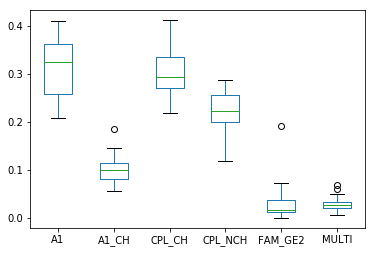

In [9]:
dfhouseholdTypeCountry[sorted(aggregations.keys())].plot(kind="box")

# Read family per type and size

In [10]:
selectedSizes = ["TOTAL"] + ["%d" % s for s in range(2, 12)]

# Create one dataframe per hh size and remember that we renamed the GE11 to 11 (we assume no hh > 11 people)
df = {}
for size in selectedSizes:
    df[size] = pd.read_excel("resources/Europe/population/structure/familiesAllTypeSize_NUTS2_2011.xls", header=10, sheetname=size)
    df[size] = df[size].rename(columns={"GEO/HHCOMP": "NUTS"})
    df[size] = df[size].set_index(["NUTS"])

# Create the multindex [houseHoldType, houseHoldSize]
multindex = pd.MultiIndex.from_product([df.values()[0].columns, sorted(df.keys())])

# Merge in an ugly way the dataframes together
ddff = pd.DataFrame(data=0, index=df.values()[0].index, columns=multindex)
for size, sizeVals in df.iteritems():
    for kind in sizeVals.columns:
        ddff[kind, size] = sizeVals[kind]

# Delete empty rows
ddff = ddff[ddff.sum(axis=1) > 1]
        
# Now we can ask for dfFamilyTypeSize[kind, size]
dfFamilyTypeSize = ddff.copy(deep=True)
del df, ddff
dfFamilyTypeSize.head()

TOTAL                                                                  \
        10   11        2       3       4       5      6      7     8     9   
NUTS                                                                         
BE     494  340  1560945  692956  575246  196809  52376  13071  4076  1329   
BE1     86   47   126361   62131   47586   21091   7831   2439   737   217   
BE10    86   47   126361   62131   47586   21091   7831   2439   737   217   
BE2    263  220   947842  400219  348698  110605  26764   6281  2044   711   
BE21   148  143   259554  106065   92558   31597   8749   2416   940   375   

       ...    F1_OCH                                                    \
       ...        11        2       3      4     5    6    7    8    9   
NUTS   ...                                                               
BE     ...       0.0  80333.0  7112.0  633.0  78.0  9.0  4.0  0.0  0.0   
BE1    ...       0.0   7904.0   749.0   81.0  14.0  1.0  0.0  0.0  0.0   
BE10   ...       0.0   7904.0   749.0   81.0  14.0  1.0  0.0  0.0  0.0   
BE2    ...       0.0  41291.0  3727.0  298.0  43.0  7.0  3.0  0.0  0.0   
BE21   ...       0.0  10498.0   968.0   77.0  12.0  1.0  2.0  0.0  0.0   

               
        TOTAL  
NUTS           
BE    88169.0  
BE1    8749.0  
BE10   8749.0  
BE2   45369.0  
BE21  11558.0  

[5 rows x 209 columns]

# Read family status per age

## 2001

These data are from the 2001 census as they are not availbale for the 2011 one.

In [196]:
sexes = ["male", "female", "total"]

dfs = {}
for sex in sexes:
    df = pd.read_csv("resources/Europe/population/structure/populationSexHouseholdAge_%s.csv" % sex)

    del df["TIME"], df["UNIT"], df["SEX"]

    df["Value"] = df["Value"].apply(lambda v: v.replace(" ", ""))
    df["Value"] = df["Value"].astype(float)

    df["AGE"] = df["AGE"].apply(lambda v: 0 if v == "Y_LT1" else\
                                                  100 if v == "Y_GE100" else\
                                                  int(v.split("Y")[1]) if v.lower() != "total" else\
                                                  v)
    df = df.pivot_table(values="Value", index="GEO", columns=["HHSTATUS", "AGE"])
    dfs[sex] = df

dfPopulationAgeHHstatus = pd.concat(dfs, axis=1)
del dfs, df

dfPopulationAgeHHstatus.head()

female                                                        \
HHSTATUS   CH_PAR                                                         
AGE             0        1        2        3        4        5        6   
GEO                                                                       
AT        36993.0  38400.0  39032.0  40280.0  43111.0  43194.0  44016.0   
BE        51830.0  53212.0  53707.0  54042.0  55732.0  55368.0  55260.0   
BG        30709.0  32651.0  29983.0  27352.0  31080.0  31515.0  34175.0   
CH        32288.0  36537.0  37312.0  38095.0  39341.0  39184.0  39777.0   
CY         3951.0   4010.0   4162.0   4190.0   4534.0   4579.0   4819.0   

                                      ...   total                           \
HHSTATUS                              ...     UNK                            
AGE             7        8        9   ...      92   93   94   95   96   97   
GEO                                   ...                                    
AT        45898.0  46359.0  46786.0   ...     0.0  0.0  0.0  0.0  0.0  0.0   
BE        55587.0  58481.0  60706.0   ...    11.0  7.0  5.0  5.0  6.0  2.0   
BG        36717.0  38641.0  40561.0   ...     0.0  0.0  0.0  0.0  0.0  0.0   
CH        40322.0  42299.0  42072.0   ...     0.0  0.0  0.0  0.0  0.0  0.0   
CY         5075.0   5225.0   5465.0   ...     0.0  0.0  0.0  0.0  0.0  0.0   

                                 
HHSTATUS                         
AGE        98   99  100   TOTAL  
GEO                              
AT        0.0  0.0  0.0     0.0  
BE        0.0  1.0  0.0  1120.0  
BG        0.0  0.0  0.0     0.0  
CH        0.0  0.0  0.0     0.0  
CY        0.0  0.0  0.0     0.0  

[5 rows x 2754 columns]

### Checking the consistency

In [241]:
# Check that the total column is ok... more or less fine
2*dfPopulationAgeHHstatus["total", "TOTAL", "TOTAL"] - dfPopulationAgeHHstatus["total", "TOTAL"].sum(axis=1)

GEO
AT         0.0
BE         0.0
BG         0.0
CH         0.0
CY      1385.0
CZ      3483.0
DE         0.0
DK         0.0
EE       441.0
EL         0.0
ES         0.0
FI         0.0
FR         0.0
HU         0.0
IE         0.0
IS         0.0
IT    392057.0
LI         0.0
LT       327.0
LU         0.0
LV        73.0
NL         0.0
NO         0.0
PL      4519.0
PT         0.0
RO         0.0
SI         0.0
SK     47524.0
TR     23381.0
UK         0.0
dtype: float64

In [261]:
# Check that the "PRV" = "P1" + "PAR1" + "MAR" + "CSU" + "CH_PAR"
# again... more or less yes...
sex = "female"
hhKindRef = "PRV"
hhKindSum = ["P1", "PAR1", "MAR", "CSU", "CH_PAR"]

(dfPopulationAgeHHstatus[sex, hhKindRef] - dfPopulationAgeHHstatus[sex][[k for k in hhKindSum]].sum(axis=1, level=1)).div(dfPopulationAgeHHstatus[sex, hhKindRef], axis="index")

AGE,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,TOTAL
GEO,,,,,,,,,,,,,,,,,,,,,
AT,0.009240,0.009109,0.009416,0.007637,0.009193,0.009494,0.011432,0.010755,0.011092,0.011828,...,0.270838,0.264033,0.274773,0.308920,0.280702,0.326353,0.306122,0.345679,0.316176,0.042099
BE,0.057480,0.047310,0.041152,0.038082,0.034458,0.031910,0.030249,0.030449,0.028406,0.027335,...,0.245441,0.258027,0.268313,0.296669,0.320147,0.360215,0.376344,0.379205,0.374429,0.042783
BG,0.005924,0.009134,0.012320,0.016610,0.017295,0.020239,0.020689,0.023432,0.022465,0.025023,...,0.682413,0.682051,0.672577,0.718631,0.727763,0.721461,0.818182,0.718750,0.714286,0.081710
CH,0.017557,0.012327,0.011446,0.010082,0.010115,0.008778,0.009043,0.009652,0.009437,0.010210,...,0.171514,0.192850,0.222377,0.251331,0.239329,0.268349,0.306397,0.387755,0.390698,0.038040
CY,0.001011,0.000997,0.002397,0.002143,0.002640,0.001526,0.001657,0.001770,0.002291,0.002555,...,0.458015,0.475248,0.482759,0.469880,0.574468,0.500000,0.550000,0.300000,0.631579,0.047128
CZ,0.009706,0.009051,0.007432,0.008163,0.007896,0.007614,0.006862,0.006728,0.007424,0.007127,...,0.336859,0.351313,0.358453,0.393271,0.386275,0.443425,0.353535,0.383929,0.441667,0.037650
DE,0.001380,0.003487,0.002103,0.004133,0.003273,0.002909,0.003570,0.005312,0.005245,0.005939,...,0.242494,0.274691,0.261084,0.311856,NaN,NaN,NaN,NaN,NaN,0.021021
DK,0.002272,0.004025,0.003642,0.004100,0.004206,0.004983,0.005409,0.006047,0.005902,0.007269,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002001
EE,0.032643,0.032140,0.027332,0.029128,0.032748,0.034050,0.032680,0.028586,0.032258,0.036070,...,0.466431,0.510101,0.488449,0.520202,0.484127,0.576923,0.518519,0.540541,0.500000,0.073355


### Age distribution

Plotting the age distribution for each kind of household...

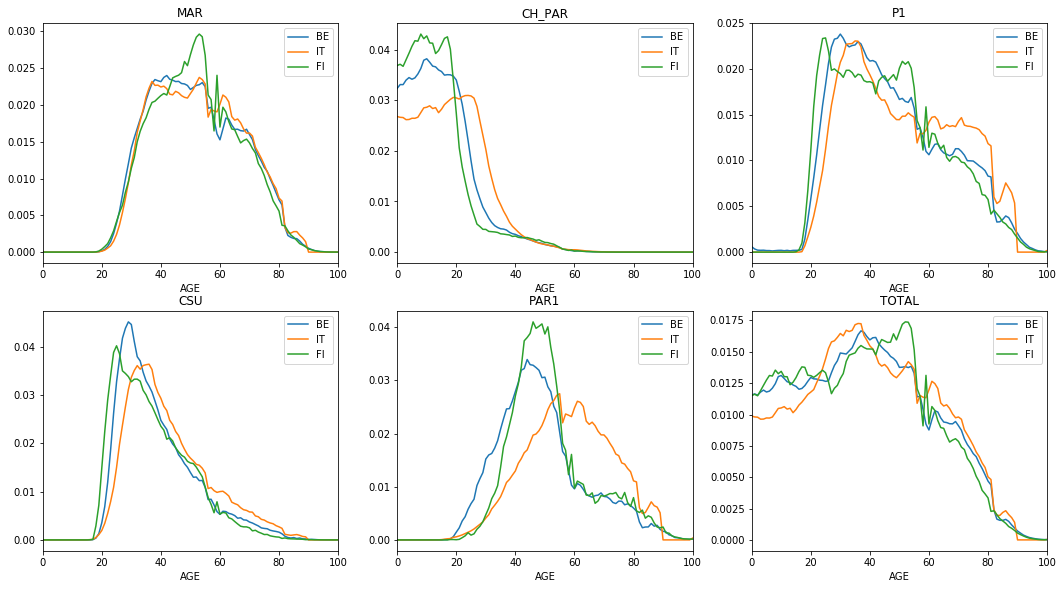

In [266]:
countries = ["BE", "IT", "FI"]
familyStatus = ["MAR", "CH_PAR", "P1", "CSU", "PAR1", "TOTAL"]
sex = "male"


ncols = 3
nrows = 1 +  len(familyStatus) / ncols
plt.figure(figsize=(6*ncols, 5*nrows))
for iii, status in enumerate(familyStatus):
    plt.subplot(nrows, ncols, iii+1)
    plt.title(status)
    for country in countries:
        (dfPopulationAgeHHstatus[sex][status].loc[country][:-1].div(\
                              dfPopulationAgeHHstatus[sex][status].loc[country][-1], axis="index")).plot(label=country)
    plt.legend()

### Preparing the CDF and PDF

We prepare the two pdf and cdf for each sex and hh group.

We use the following grouping:

- `P1` + `UNK` sets the distribution for those living alone and/or in multi (non families);
- `PAR1` sets the `{M,F}1_{Y,O}CH` distribution;
- `MAR` + `CSU` sets the `CPL_{Y,O,N}CH` age distribution;
- `CH_PAR` sets the age distribution for the children of all the couples/lone parents;

In [299]:
aggregations = {\
                    "CPL_XCH": ["MAR", "CSU"],\
                    "A1_XCH": ["PAR1"],\
                    "A1_HH": ["P1", "UNK"],\
                    "CH_AGE": ["CH_PAR"],\
                    "TOTAL": ["TOTAL"],\
               }

dfs_pdf, dfs_cdf = {}, {}
for aggKey, aggCols in aggregations.iteritems():
    for sex in dfPopulationAgeHHstatus.columns.get_level_values(0).unique():
        tmp_df = dfPopulationAgeHHstatus[sex][aggCols].sum(axis=1, level=1)
        tmp_sum = tmp_df["TOTAL"].copy()
        del tmp_df["TOTAL"]
        
        dfs_pdf[(sex, aggKey)] = tmp_df.div(tmp_sum, axis="index")
        dfs_cdf[(sex, aggKey)] = tmp_df.div(tmp_sum, axis="index").cumsum(axis=1)
        del tmp_df, tmp_sum

dfPopulationAgeHHstatus_PDF = pd.concat(dfs_pdf, axis=1)
dfPopulationAgeHHstatus_CDF = pd.concat(dfs_cdf, axis=1)
del dfs_pdf, dfs_cdf

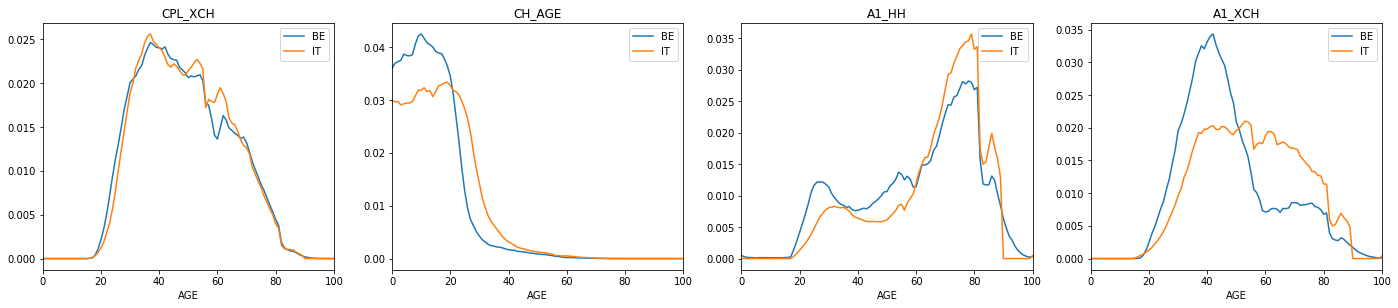

In [302]:
# Check visually that things are working...
countries = ["BE", "IT"]
familyStatus = ["CPL_XCH", "CH_AGE", "A1_HH", "A1_XCH"]
sex = "female"

ncols = 4
nrows = 1 +  len(familyStatus) / ncols
plt.figure(figsize=(6*ncols, 5*nrows))
for iii, status in enumerate(familyStatus):
    plt.subplot(nrows, ncols, iii+1)
    plt.title(status)
    for country in countries:
        dfPopulationAgeHHstatus_PDF[sex][status].loc[country].plot(label=country)
        #dfPopulationAgeHHstatus_PDF[sex]["TOTAL"].loc[country].plot(label=country+"tot")
    plt.legend()

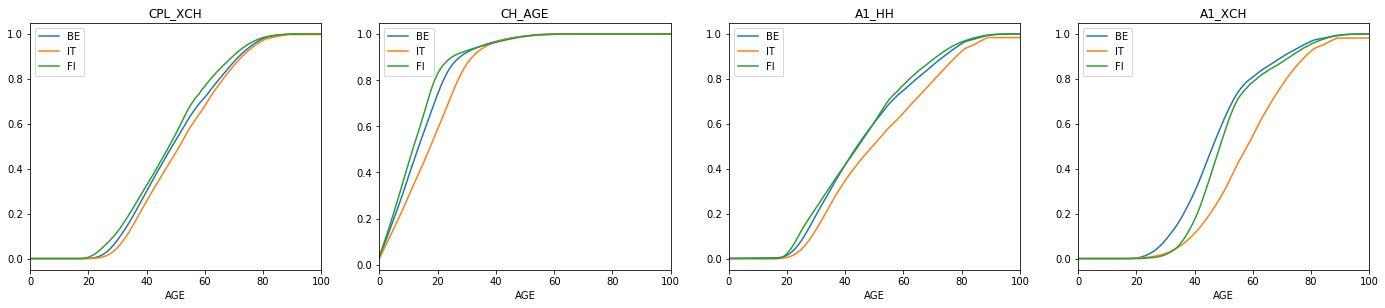

In [297]:
# Check visually that things are working...
countries = ["BE", "IT", "FI"]
familyStatus = ["CPL_XCH", "CH_AGE", "A1_HH", "A1_XCH"]
sex = "male"

ncols = 4
nrows = 1 +  len(familyStatus) / ncols
plt.figure(figsize=(6*ncols, 5*nrows))
for iii, status in enumerate(familyStatus):
    plt.subplot(nrows, ncols, iii+1)
    plt.title(status)
    for country in countries:
        dfPopulationAgeHHstatus_CDF[sex][status].loc[country].plot(label=country)
    plt.legend()

## 2011

In [823]:
dfpopulationAge.head()

female                                                        \
           TOTAL       Y0       Y1       Y2       Y3       Y4       Y5   
GEO/AGE                                                                  
BE       5598920  63694.0  63241.0  63440.0  62553.0  62400.0  60731.0   
BE1       582295   9024.0   8802.0   8327.0   7930.0   7733.0   7468.0   
BE10      582295   9024.0   8802.0   8327.0   7930.0   7733.0   7468.0   
BE2      3200462  34621.0  34129.0  34897.0  34378.0  34026.0  33018.0   
BE21      894659  10492.0  10199.0  10219.0  10120.0   9883.0   9617.0   

                                     ...      total                          \
              Y6       Y7       Y8   ...        Y91     Y92     Y93     Y94   
GEO/AGE                              ...                                      
BE       60017.0  58632.0  58087.0   ...    13187.0  7405.0  5758.0  4902.0   
BE1       7096.0   6698.0   6506.0   ...     1451.0   851.0   708.0   586.0   
BE10      7096.0   6698.0   6506.0   ...     1451.0   851.0   708.0   586.0   
BE2      32786.0  31753.0  31591.0   ...     7468.0  4241.0  3226.0  2823.0   
BE21      9337.0   9147.0   8878.0   ...     2065.0  1206.0   935.0   831.0   

                                                         
            Y95     Y96     Y97     Y98     Y99    Y100  
GEO/AGE                                                  
BE       4358.0  3697.0  2534.0  1665.0  1138.0  1630.0  
BE1       499.0   492.0   298.0   227.0   152.0   237.0  
BE10      499.0   492.0   298.0   227.0   152.0   237.0  
BE2      2535.0  2044.0  1466.0   977.0   656.0   923.0  
BE21      752.0   556.0   442.0   278.0   170.0   273.0  

[5 rows x 306 columns]

In [807]:
# Read the sheet for each sex and then clean the dataframe later
sexes = ["male", "female", "total"]

dfs = {}
for sex in sexes:
    df = pd.read_excel("resources/Europe/population/structure/populationSexHouseholdAge_total_NUTS2_2011.xls",\
                       sheetname=sex, header=[10,11], index_col=0)
    # Delete empty rows
    df.fillna(0, inplace=True)
    df = df[df.sum(axis=1, level=1) > 0]
    
    if False:
        # Now, for each age group of 2011 we decompose it in the 5 years using the population curve
        hhkinds   = df.columns.get_level_values(0).unique()
        ageGroups = df.columns.get_level_values(1).unique()
        
        tmp_dfs = {}
        for hhkind in hhkinds:
            for ageGroup in ageGroups:
                if ageGroup == "TOTAL": continue
                #if ageGroup == "100-101": continue
                #print (hhkind, ageGroup)
                Yini, Yfin = int(ageGroup.split("-")[0]), min(100, int(ageGroup.split("-")[1]))
                popSlice = dfpopulationAge[[(sex, "Y%d"%y) for y in range(Yini, Yfin+1)]][sex]
                popSlice = popSlice.div(popSlice.sum(axis=1).apply(lambda v: max(1., v)), axis="index")
                popSlice.rename(columns={k: int(k[1:]) for k in popSlice}, inplace=True)
                popSlice = popSlice.mul(df[hhkind, ageGroup], axis="index")

                for col in popSlice.columns:
                    df[hhkind, col] = popSlice[col]
                del df[hhkind, ageGroup]
            df[hhkind] = pd.concat({age: df[hhkind, age] for age in sorted(df[hhkind].columns)}, axis=1)
        df = df[df.columns]
        
    dfs[sex] = df
    del df

dfPopulationAgeHHstatus2011 = pd.concat(dfs, axis=1)
del dfs
dfPopulationAgeHHstatus2011.head()

female                                                    \
HHSTATUS      TOTAL                                                     
GEO/AGE       TOTAL   000-004   005-009   010-014   015-019   020-024   
BE        5598920.0  315328.0  296765.0  300722.0  317228.0  339446.0   
BE1        582295.0   41816.0   34233.0   30020.0   30059.0   40627.0   
BE10       582295.0   41816.0   34233.0   30020.0   30059.0   40627.0   
BE2       3200462.0  172051.0  161155.0  167276.0  179129.0  185169.0   
BE21       894659.0   50913.0   45904.0   46959.0   50018.0   53529.0   

                                                   ...     total          \
HHSTATUS                                           ...       UNK           
GEO/AGE    025-029   030-034   035-039   040-044   ...   055-059 060-064   
BE        349328.0  358208.0  365389.0  388365.0   ...       0.0     0.0   
BE1        51401.0   51105.0   43747.0   39183.0   ...       0.0     0.0   
BE10       51401.0   51105.0   43747.0   39183.0   ...       0.0     0.0   
BE2       191737.0  198789.0  202451.0  225482.0   ...       0.0     0.0   
BE21       56564.0   56392.0   56554.0   62542.0   ...       0.0     0.0   

                                                                          
HHSTATUS                                                                  
GEO/AGE  065-069 070-074 075-079 080-084 085-089 090-094 095-099 100-101  
BE           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE1          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE10         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE2          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE21         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 594 columns]

In [812]:
# The Nan are in additional, useless areas...
print dfPopulationAgeHHstatus2011.shape
print dfPopulationAgeHHstatus2011.dropna(axis=0, how="any").index.symmetric_difference(dfPopulationAgeHHstatus2011.index)

(488, 594)
Index([u'ATZ', u'ATZZ', u'BEZ', u'BEZZ', u'BGZ', u'BGZZ', u'CH', u'CH0',
       u'CH01', u'CH02', u'CH03', u'CH04', u'CH05', u'CH06', u'CH07', u'CHZ',
       u'CHZZ', u'CYZ', u'CYZZ', u'CZZ', u'CZZZ', u'DEZ', u'DEZZ', u'DKZ',
       u'DKZZ', u'EEZ', u'EEZZ', u'ELS', u'ELSS', u'ELZ', u'ELZZ', u'ES53',
       u'ES63', u'ES64', u'ES7', u'ES70', u'ESZ', u'ESZZ', u'FIZ', u'FIZZ',
       u'FRZ', u'FRZZ', u'HRZ', u'HRZZ', u'HUZ', u'HUZZ', u'IEZ', u'IEZZ',
       u'ISZ', u'ISZZ', u'ITZ', u'ITZZ', u'LI', u'LI0', u'LI00', u'LIZ',
       u'LIZZ', u'LTZ', u'LTZZ', u'LUZ', u'LUZZ', u'LVZ', u'LVZZ', u'MTZ',
       u'MTZZ', u'NLZ', u'NLZZ', u'NOZ', u'NOZZ', u'PLZ', u'PLZZ', u'PTZ',
       u'PTZZ', u'ROZ', u'ROZZ', u'SEZ', u'SEZZ', u'SIZ', u'SIZZ', u'SKZ',
       u'SKZZ', u'UKZ', u'UKZZ'],
      dtype='object')


In [813]:
# So we drop them
dfPopulationAgeHHstatus2011.dropna(axis=0, how="any", inplace=True)

In [814]:
dfPopulationAgeHHstatus2011.index.symmetric_difference(dfpopulationAge.index)

Index([u'CH', u'CH0', u'CH01', u'CH02', u'CH03', u'CH04', u'CH05', u'CH06',
       u'CH07', u'DEZ', u'DEZZ', u'ES53', u'ES63', u'ES64', u'ES7', u'ES70',
       u'LI', u'LI0', u'LI00', u'NOZ', u'NOZZ'],
      dtype='object')

In [815]:
dfPopulationAgeHHstatus2011.head()

female                                                    \
HHSTATUS      TOTAL                                                     
GEO/AGE       TOTAL   000-004   005-009   010-014   015-019   020-024   
BE        5598920.0  315328.0  296765.0  300722.0  317228.0  339446.0   
BE1        582295.0   41816.0   34233.0   30020.0   30059.0   40627.0   
BE10       582295.0   41816.0   34233.0   30020.0   30059.0   40627.0   
BE2       3200462.0  172051.0  161155.0  167276.0  179129.0  185169.0   
BE21       894659.0   50913.0   45904.0   46959.0   50018.0   53529.0   

                                                   ...     total          \
HHSTATUS                                           ...       UNK           
GEO/AGE    025-029   030-034   035-039   040-044   ...   055-059 060-064   
BE        349328.0  358208.0  365389.0  388365.0   ...       0.0     0.0   
BE1        51401.0   51105.0   43747.0   39183.0   ...       0.0     0.0   
BE10       51401.0   51105.0   43747.0   39183.0   ...       0.0     0.0   
BE2       191737.0  198789.0  202451.0  225482.0   ...       0.0     0.0   
BE21       56564.0   56392.0   56554.0   62542.0   ...       0.0     0.0   

                                                                          
HHSTATUS                                                                  
GEO/AGE  065-069 070-074 075-079 080-084 085-089 090-094 095-099 100-101  
BE           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE1          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE10         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE2          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE21         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 594 columns]

In [817]:
dfPopulationAgeHHstatus2011 = dfPopulationAgeHHstatus2011[dfPopulationAgeHHstatus2011.columns.get_level_values(0).unique()]
dfPopulationAgeHHstatus2011.head()

female                                                    \
HHSTATUS      TOTAL                                                     
GEO/AGE       TOTAL   000-004   005-009   010-014   015-019   020-024   
BE        5598920.0  315328.0  296765.0  300722.0  317228.0  339446.0   
BE1        582295.0   41816.0   34233.0   30020.0   30059.0   40627.0   
BE10       582295.0   41816.0   34233.0   30020.0   30059.0   40627.0   
BE2       3200462.0  172051.0  161155.0  167276.0  179129.0  185169.0   
BE21       894659.0   50913.0   45904.0   46959.0   50018.0   53529.0   

                                                   ...     total          \
HHSTATUS                                           ...       UNK           
GEO/AGE    025-029   030-034   035-039   040-044   ...   055-059 060-064   
BE        349328.0  358208.0  365389.0  388365.0   ...       0.0     0.0   
BE1        51401.0   51105.0   43747.0   39183.0   ...       0.0     0.0   
BE10       51401.0   51105.0   43747.0   39183.0   ...       0.0     0.0   
BE2       191737.0  198789.0  202451.0  225482.0   ...       0.0     0.0   
BE21       56564.0   56392.0   56554.0   62542.0   ...       0.0     0.0   

                                                                          
HHSTATUS                                                                  
GEO/AGE  065-069 070-074 075-079 080-084 085-089 090-094 095-099 100-101  
BE           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE1          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE10         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE2          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
BE21         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 594 columns]

### Checking the consistency

In [818]:
dfPopulationAgeHHstatus2011["total", "TOTAL", "TOTAL"]

BE      11000638.0
BE1      1136778.0
BE10     1136778.0
BE2      6325740.0
BE21     1773267.0
BE22      846851.0
BE23     1448928.0
BE24     1088692.0
BE25     1168002.0
BE3      3538120.0
BE31      383648.0
BE32     1319745.0
BE33     1082136.0
BE34      273205.0
BE35      479386.0
BG       7364570.0
BG3      3752349.0
BG31      847138.0
BG32      861112.0
BG33      966097.0
BG34     1078002.0
BG4      3612221.0
BG41     2132848.0
BG42     1479373.0
CZ      10436560.0
CZ0     10436560.0
CZ01     1268796.0
CZ02     1289211.0
CZ03     1198737.0
CZ04     1104556.0
           ...    
UKJ2     2739320.0
UKJ3     1897990.0
UKJ4     1727665.0
UKK      5288935.0
UKK1     2346705.0
UKK2     1274015.0
UKK3      534475.0
UKK4     1133740.0
UKL      3063455.0
UKL1     1933645.0
UKL2     1129810.0
UKM      5295405.0
UKM2     2021295.0
UKM3     2332050.0
UKM5      475765.0
UKM6      466295.0
UKN      1810865.0
UKN0     1810865.0
IS        315556.0
IS0       315556.0
IS00      315556.0
NO       497

In [819]:
# Check that the total column is ok... more or less fine
(2*dfPopulationAgeHHstatus2011["total", "TOTAL", "TOTAL"]).sub(dfPopulationAgeHHstatus2011["total", "TOTAL"].sum(axis=1), axis="index").values

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.56270000e+04,   3.56270000e+04,   5.82400000e+03,
         3.97600000e+03,   3.76000000e+03,   5.43000000e+03,
         5.15800000e+03,   4.53200000e+03,   3.14600000e+03,
         3.80100000e+03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [820]:
# Check that the "CPL" = "MAR" + "CSU" + "REP"
# again... yes!
sex = "female"
hhKindRef = "CPL"
hhKindSum = ["MAR", "REP", "CSU"]

(dfPopulationAgeHHstatus2011[sex, hhKindRef] - dfPopulationAgeHHstatus2011[sex][[k for k in hhKindSum]].sum(axis=1, level=1)).div(1. + dfPopulationAgeHHstatus2011[sex, hhKindRef], axis="index")

GEO/AGE,000-004,005-009,010-014,015-019,020-024,025-029,030-034,035-039,040-044,045-049,...,060-064,065-069,070-074,075-079,080-084,085-089,090-094,095-099,100-101,TOTAL
BE,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE10,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE21,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE22,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE23,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE24,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BE3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Age distribution

Plotting the age distribution for each kind of household...

In [838]:
dfpopulationAge[[("male", "Y%d"%y) for y in range(2, 5)]].sum(axis=1)

GEO/AGE
BE      197327.0
BE1      25311.0
BE10     25311.0
BE2     107752.0
BE21     31530.0
BE22     13663.0
BE23     25160.0
BE24     18912.0
BE25     18487.0
BE3      64264.0
BE31      6838.0
BE32     24154.0
BE33     19113.0
BE34      5375.0
BE35      8784.0
BG      105503.0
BG3      53921.0
BG31     10968.0
BG32     10789.0
BG33     14869.0
BG34     17295.0
BG4      51582.0
BG41     30217.0
BG42     21365.0
CZ      175817.0
CZ0     175817.0
CZ01     19833.0
CZ02     24637.0
CZ03     19920.0
CZ04     19115.0
          ...   
UKM5      7960.0
UKM6      7890.0
UKN      38000.0
UKN0     38000.0
IS        7198.0
IS0       7198.0
IS00      7198.0
LI         575.0
LI0        575.0
LI00       575.0
NO       96168.0
NO0      96168.0
NO01     24154.0
NO02      6167.0
NO03     17188.0
NO04     15348.0
NO05     16585.0
NO06      8216.0
NO07      8461.0
NOZ         49.0
NOZZ        49.0
CH      122391.0
CH0     122391.0
CH01     24558.0
CH02     26419.0
CH03     15964.0
CH04     22405.0
CH05  

In [877]:
columnsAges = pd.MultiIndex.from_product(iterables=[\
                                    ["male", "female", "total"],\
                                    dfPopulationAgeHHstatus2011.columns.get_level_values(1).unique(),\
                                    range(0, 101),\
                                                   ], names=["sex", "hhkind", "age"])
dfAgesFixed = pd.DataFrame(columns=columnsAges)
dfAgesFixed.head()

Empty DataFrame
Columns: [(male, TOTAL, 0), (male, TOTAL, 1), (male, TOTAL, 2), (male, TOTAL, 3), (male, TOTAL, 4), (male, TOTAL, 5), (male, TOTAL, 6), (male, TOTAL, 7), (male, TOTAL, 8), (male, TOTAL, 9), (male, TOTAL, 10), (male, TOTAL, 11), (male, TOTAL, 12), (male, TOTAL, 13), (male, TOTAL, 14), (male, TOTAL, 15), (male, TOTAL, 16), (male, TOTAL, 17), (male, TOTAL, 18), (male, TOTAL, 19), (male, TOTAL, 20), (male, TOTAL, 21), (male, TOTAL, 22), (male, TOTAL, 23), (male, TOTAL, 24), (male, TOTAL, 25), (male, TOTAL, 26), (male, TOTAL, 27), (male, TOTAL, 28), (male, TOTAL, 29), (male, TOTAL, 30), (male, TOTAL, 31), (male, TOTAL, 32), (male, TOTAL, 33), (male, TOTAL, 34), (male, TOTAL, 35), (male, TOTAL, 36), (male, TOTAL, 37), (male, TOTAL, 38), (male, TOTAL, 39), (male, TOTAL, 40), (male, TOTAL, 41), (male, TOTAL, 42), (male, TOTAL, 43), (male, TOTAL, 44), (male, TOTAL, 45), (male, TOTAL, 46), (male, TOTAL, 47), (male, TOTAL, 48), (male, TOTAL, 49), (male, TOTAL, 50), (male, TOTAL, 51), (male, TOTAL, 52), (male, TOTAL, 53), (male, TOTAL, 54), (male, TOTAL, 55), (male, TOTAL, 56), (male, TOTAL, 57), (male, TOTAL, 58), (male, TOTAL, 59), (male, TOTAL, 60), (male, TOTAL, 61), (male, TOTAL, 62), (male, TOTAL, 63), (male, TOTAL, 64), (male, TOTAL, 65), (male, TOTAL, 66), (male, TOTAL, 67), (male, TOTAL, 68), (male, TOTAL, 69), (male, TOTAL, 70), (male, TOTAL, 71), (male, TOTAL, 72), (male, TOTAL, 73), (male, TOTAL, 74), (male, TOTAL, 75), (male, TOTAL, 76), (male, TOTAL, 77), (male, TOTAL, 78), (male, TOTAL, 79), (male, TOTAL, 80), (male, TOTAL, 81), (male, TOTAL, 82), (male, TOTAL, 83), (male, TOTAL, 84), (male, TOTAL, 85), (male, TOTAL, 86), (male, TOTAL, 87), (male, TOTAL, 88), (male, TOTAL, 89), (male, TOTAL, 90), (male, TOTAL, 91), (male, TOTAL, 92), (male, TOTAL, 93), (male, TOTAL, 94), (male, TOTAL, 95), (male, TOTAL, 96), (male, TOTAL, 97), (male, TOTAL, 98), (male, TOTAL, 99), ...]
Index: []

[0 rows x 2727 columns]

In [880]:
for sex in ["male", "female", "total"]:
    for age in range(0, 101):
        for hhkind in hhkinds:
            ageIni = min(100, age - age%5)
            ageFin = min(101, ageIni + 4)
            
            rangeSTR = "%03d-%03d" % (ageIni, ageFin)
            popCol = "Y%d" % age
            popColumns = [(sex, "Y%d" % y) for y in range(ageIni, min(101, ageFin+1))] 

            dfAgesFixed[sex, hhkind, age] =\
                        dfPopulationAgeHHstatus2011[sex, hhkind, rangeSTR].mul(\
                                dfpopulationAge[sex, popCol].div(\
                                                dfpopulationAge[popColumns].sum(axis=1).apply(lambda v: max(1.,v)), axis="index"),
                                            axis="index")

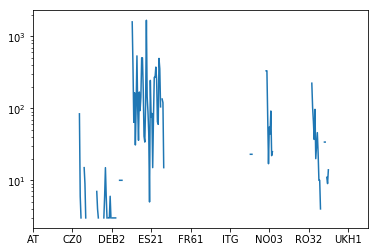

In [881]:
dfAgesFixed[sex, hhkind, age].plot()
plt.yscale("log")

In [882]:
dfAgesFixed.head()

sex        male                                                        \
hhkind    TOTAL                                                         
age         0        1        2        3        4        5        6     
AT      40944.0  40705.0  39958.0  40771.0  40259.0  40902.0  41552.0   
AT1     17930.0  17734.0  17579.0  17671.0  17441.0  17530.0  17836.0   
AT11     1127.0   1142.0   1178.0   1184.0   1247.0   1207.0   1298.0   
AT12     7432.0   7416.0   7394.0   7590.0   7578.0   7838.0   8149.0   
AT13     9371.0   9176.0   9007.0   8897.0   8616.0   8485.0   8389.0   

sex                               ...  total                                \
hhkind                            ...    UNK                                 
age         7        8        9   ...    91   92   93   94   95   96   97    
AT      41723.0  41691.0  41911.0 ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AT1     17922.0  17813.0  17917.0 ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AT11     1347.0   1323.0   1328.0 ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AT12     8261.0   8264.0   8501.0 ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AT13     8314.0   8226.0   8088.0 ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   

sex                    
hhkind                 
age     98   99   100  
AT      0.0  0.0  0.0  
AT1     0.0  0.0  0.0  
AT11    0.0  0.0  0.0  
AT12    0.0  0.0  0.0  
AT13    0.0  0.0  0.0  

[5 rows x 2727 columns]

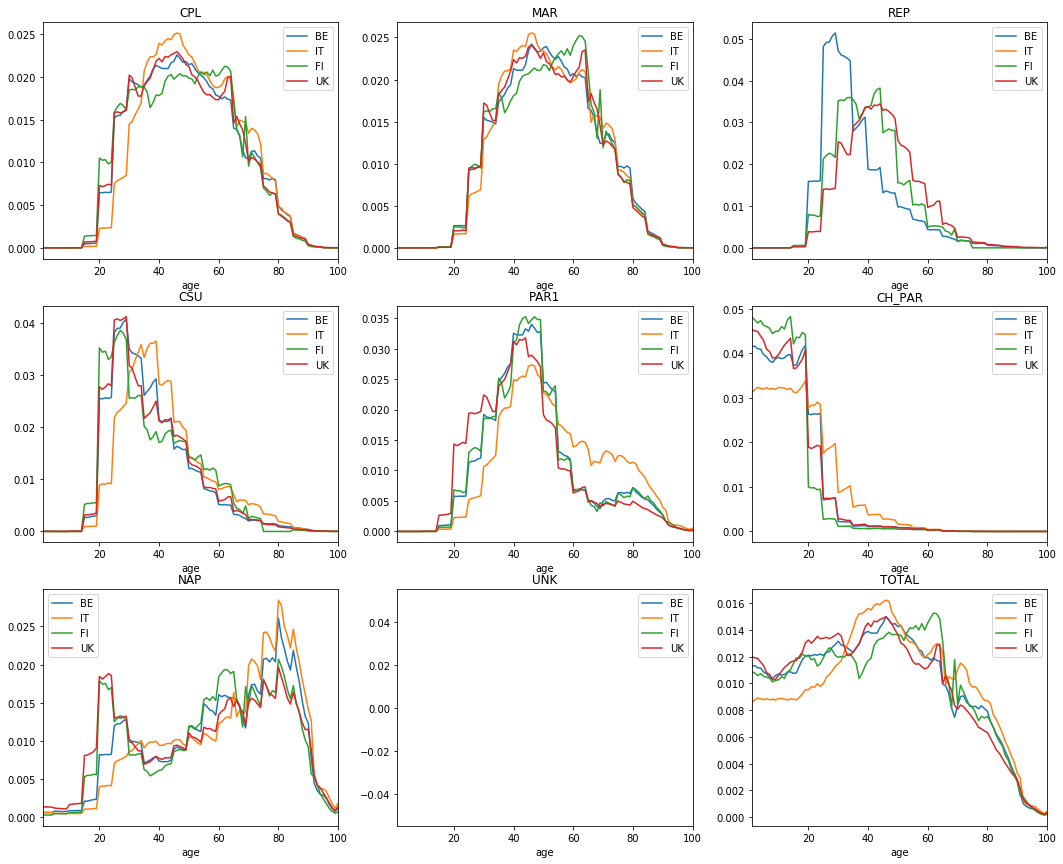

In [886]:
countries = ["BE", "IT", "FI", "UK"]
familyStatus = ["CPL", "MAR", "REP", "CSU", "PAR1", "CH_PAR", "NAP", "UNK", "TOTAL"]
sex = "female"


ncols = 3
nrows = 1 +  len(familyStatus) / ncols
plt.figure(figsize=(6*ncols, 5*nrows))
for iii, status in enumerate(familyStatus):
    plt.subplot(nrows, ncols, iii+1)
    plt.title(status)
    for country in countries:
        (dfAgesFixed[sex][status].loc[country][1:]\
                 .div(dfAgesFixed[sex][status].sum(axis=1).loc[country], axis="index")\
                ).plot(label=country)
    plt.legend()

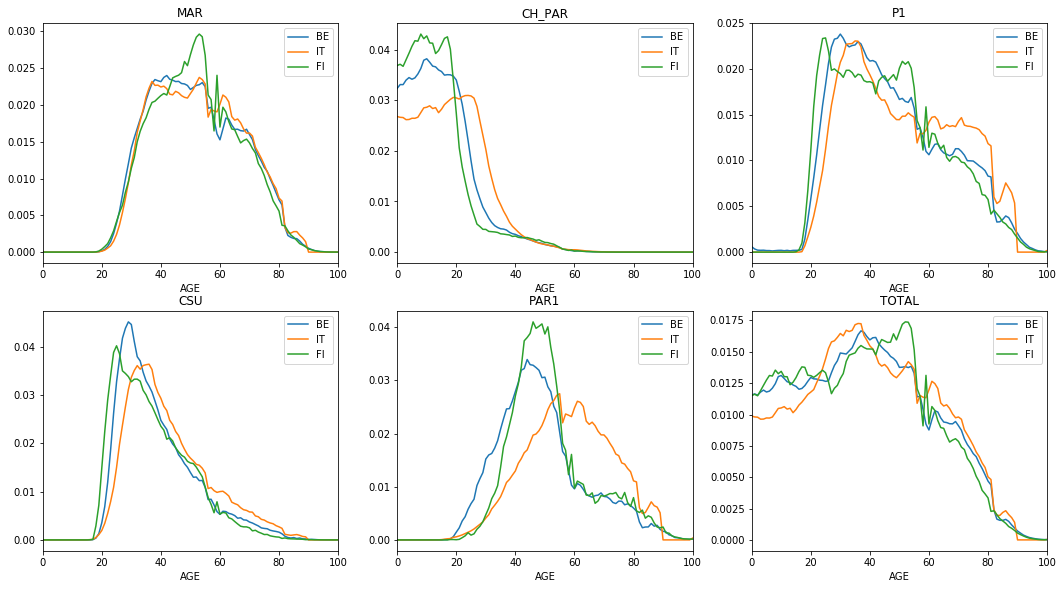

In [266]:
countries = ["BE", "IT", "FI"]
familyStatus = ["MAR", "CH_PAR", "P1", "CSU", "PAR1", "TOTAL"]
sex = "male"


ncols = 3
nrows = 1 +  len(familyStatus) / ncols
plt.figure(figsize=(6*ncols, 5*nrows))
for iii, status in enumerate(familyStatus):
    plt.subplot(nrows, ncols, iii+1)
    plt.title(status)
    for country in countries:
        (dfPopulationAgeHHstatus[sex][status].loc[country][:-1].div(\
                              dfPopulationAgeHHstatus[sex][status].loc[country][-1], axis="index")).plot(label=country)
    plt.legend()

### Preparing the CDF and PDF

We prepare the two pdf and cdf for each sex and hh group.

We use the following grouping:

- `NAP` + `UNK` sets the distribution for those living alone and/or in multi (non families);
- `PAR1` sets the `{M,F}1_{Y,O}CH` distribution;
- `MAR` + `CSU` + `REP` sets the `CPL_{Y,O,N}CH` age distribution;
- `CH_PAR` sets the age distribution for the children of all the couples/lone parents;

In [890]:
aggregations = {\
                    "CPL_XCH": ["MAR", "CSU", "REP"],\
                    "A1_XCH": ["PAR1"],\
                    "A1_HH": ["NAP", "UNK"],\
                    "CH_AGE": ["CH_PAR"],\
                    "TOTAL": ["TOTAL"],\
               }

dfs_pdf, dfs_cdf = {}, {}
for aggKey, aggCols in aggregations.iteritems():
    for sex in dfAgesFixed.columns.get_level_values(0).unique():
        tmp_df = dfAgesFixed[sex][aggCols].sum(axis=1, level=1)
        tmp_sum = tmp_df.sum(axis=1).copy()
        #del tmp_df["TOTAL"]
        
        dfs_pdf[(sex, aggKey)] = tmp_df.div(tmp_sum, axis="index")
        dfs_cdf[(sex, aggKey)] = tmp_df.div(tmp_sum, axis="index").cumsum(axis=1)
        del tmp_df, tmp_sum

dfPopulationAgeHHstatus2011_PDF = pd.concat(dfs_pdf, axis=1)
dfPopulationAgeHHstatus2011_CDF = pd.concat(dfs_cdf, axis=1)
del dfs_pdf, dfs_cdf

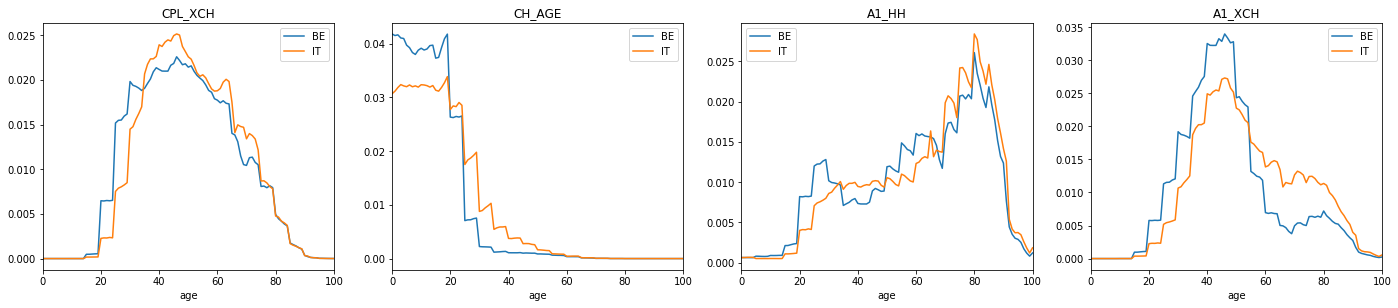

In [891]:
# Check visually that things are working...
countries = ["BE", "IT"]
familyStatus = ["CPL_XCH", "CH_AGE", "A1_HH", "A1_XCH"]
sex = "female"

ncols = 4
nrows = 1 +  len(familyStatus) / ncols
plt.figure(figsize=(6*ncols, 5*nrows))
for iii, status in enumerate(familyStatus):
    plt.subplot(nrows, ncols, iii+1)
    plt.title(status)
    for country in countries:
        dfPopulationAgeHHstatus2011_PDF[sex][status].loc[country].plot(label=country)
        #dfPopulationAgeHHstatus_PDF[sex]["TOTAL"].loc[country].plot(label=country+"tot")
    plt.legend()

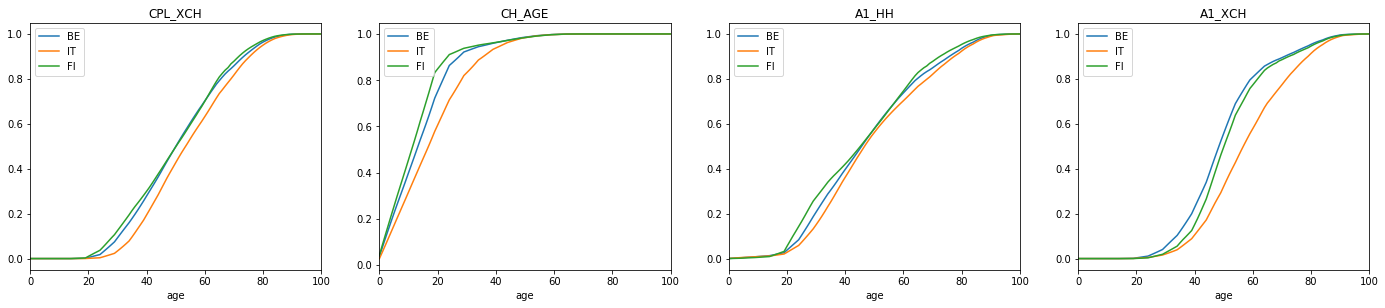

In [893]:
# Check visually that things are working...
countries = ["BE", "IT", "FI"]
familyStatus = ["CPL_XCH", "CH_AGE", "A1_HH", "A1_XCH"]
sex = "male"

ncols = 4
nrows = 1 +  len(familyStatus) / ncols
plt.figure(figsize=(6*ncols, 5*nrows))
for iii, status in enumerate(familyStatus):
    plt.subplot(nrows, ncols, iii+1)
    plt.title(status)
    for country in countries:
        dfPopulationAgeHHstatus2011_CDF[sex][status].loc[country].plot(label=country)
    plt.legend()

# See if totals are comparable


In [11]:
problematic = dfFamilyTypeSize.loc[[i for i in dfFamilyTypeSize.index if len(i) < 5]].index.symmetric_difference(dfhouseholdType.index)

In [12]:
problematic

Index([u'FI', u'HR', u'HR0', u'HR03', u'HR04', u'NOZ'], dtype='object', name=u'NUTS')

Now, among these problematic NUTS we have:
- `FI` is troublesome and we delete it all;
- `HR` is a problem also for the Ajelli paper so we delete it;
- `IS` is empty and we delete it;
- `NOZ` is very little and we delete it;

In [13]:
selectedProblematicRoots = ["FI", "HR", "IS", "NOZ"]
for problematicRoot in selectedProblematicRoots:
    dfFamilyTypeSize = dfFamilyTypeSize[ ~dfFamilyTypeSize.index.str.startswith(problematicRoot)]
    dfhouseholdType = dfhouseholdType[ ~dfhouseholdType.index.str.startswith(problematicRoot)]

In [14]:
# Check that we have all the codes in both...
dfFamilyTypeSize[dfFamilyTypeSize.index.str.len() < 5].index.symmetric_difference(dfhouseholdType.index)

Index([], dtype='object', name=u'NUTS')

## Hint

In many countries the counter per size-kind of household are larger than the total ones.
Nevertheless the proportion of household per kind is very similar so that we can use the overall counter to select the household size and then the fraction per size to determine the size.

We assume the non families to have the same distribution size of families;

We assume the multifamilies to have 2 families sampled from the distribution;

## Strategy

- sample household type $t$ from kind table;
- sample size from $P_t(s)$ size distribution;
- sample first element $h$ from the age distribution:
    - if household is single/not family:
        - if age $h$ > 15 ok and sample other $s-1$ elements with age $>15$;
    - if household is couple with young child (at least one younger than $<25$):
        - if age $h$ < 25 this is one of the children:
            - extract $s-3$ others brothers with constraints:
                - age brothers $h-10<b<h+10$ and $max(b) - min(b) <= 20$;
            - extract $2$ parents with constraints:
                - age parents $max(b)+15 < p < 70$ and $|p_1-p_2|<15$;


In [15]:
dfFamilyTypeSize.head()

TOTAL                                                                  \
        10   11        2       3       4       5      6      7     8     9   
NUTS                                                                         
BE     494  340  1560945  692956  575246  196809  52376  13071  4076  1329   
BE1     86   47   126361   62131   47586   21091   7831   2439   737   217   
BE10    86   47   126361   62131   47586   21091   7831   2439   737   217   
BE2    263  220   947842  400219  348698  110605  26764   6281  2044   711   
BE21   148  143   259554  106065   92558   31597   8749   2416   940   375   

       ...    F1_OCH                                                    \
       ...        11        2       3      4     5    6    7    8    9   
NUTS   ...                                                               
BE     ...       0.0  80333.0  7112.0  633.0  78.0  9.0  4.0  0.0  0.0   
BE1    ...       0.0   7904.0   749.0   81.0  14.0  1.0  0.0  0.0  0.0   
BE10   ...       0.0   7904.0   749.0   81.0  14.0  1.0  0.0  0.0  0.0   
BE2    ...       0.0  41291.0  3727.0  298.0  43.0  7.0  3.0  0.0  0.0   
BE21   ...       0.0  10498.0   968.0   77.0  12.0  1.0  2.0  0.0  0.0   

               
        TOTAL  
NUTS           
BE    88169.0  
BE1    8749.0  
BE10   8749.0  
BE2   45369.0  
BE21  11558.0  

[5 rows x 209 columns]

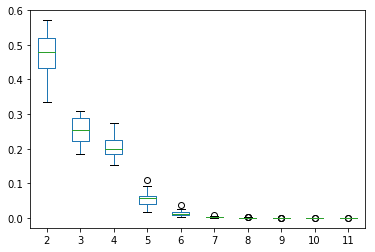

In [16]:
# Check the household size distribution
dfFamilyTypeSizeCountry = dfFamilyTypeSize[dfFamilyTypeSize.index.str.len() == 2]["TOTAL"].copy()

dfFamilyTypeSizeCountry = dfFamilyTypeSizeCountry.div(dfFamilyTypeSizeCountry["TOTAL"], axis="index")

dfFamilyTypeSizeCountry[["%d" % s for s in range(2, 12)]].plot(kind="box")

# Syn Pop generation trials

To generate the households we need:

## Population age CDF per sex

I.e., an array with shape (2,101);

In [17]:
dfpopulationAge.head()

female                                                        \
           TOTAL       Y0       Y1       Y2       Y3       Y4       Y5   
GEO/AGE                                                                  
BE       5598920  63694.0  63241.0  63440.0  62553.0  62400.0  60731.0   
BE1       582295   9024.0   8802.0   8327.0   7930.0   7733.0   7468.0   
BE10      582295   9024.0   8802.0   8327.0   7930.0   7733.0   7468.0   
BE2      3200462  34621.0  34129.0  34897.0  34378.0  34026.0  33018.0   
BE21      894659  10492.0  10199.0  10219.0  10120.0   9883.0   9617.0   

                                     ...      total                          \
              Y6       Y7       Y8   ...        Y91     Y92     Y93     Y94   
GEO/AGE                              ...                                      
BE       60017.0  58632.0  58087.0   ...    13187.0  7405.0  5758.0  4902.0   
BE1       7096.0   6698.0   6506.0   ...     1451.0   851.0   708.0   586.0   
BE10      7096.0   6698.0   6506.0   ...     1451.0   851.0   708.0   586.0   
BE2      32786.0  31753.0  31591.0   ...     7468.0  4241.0  3226.0  2823.0   
BE21      9337.0   9147.0   8878.0   ...     2065.0  1206.0   935.0   831.0   

                                                         
            Y95     Y96     Y97     Y98     Y99    Y100  
GEO/AGE                                                  
BE       4358.0  3697.0  2534.0  1665.0  1138.0  1630.0  
BE1       499.0   492.0   298.0   227.0   152.0   237.0  
BE10      499.0   492.0   298.0   227.0   152.0   237.0  
BE2      2535.0  2044.0  1466.0   977.0   656.0   923.0  
BE21      752.0   556.0   442.0   278.0   170.0   273.0  

[5 rows x 306 columns]

In [18]:
reduce(lambda x,y: x and y, ["Y%d" % y in dfpopulationAge.columns.get_level_values(1).unique() for y in range(101)], True)

True

In [19]:
ageCols = ["Y%d" % d for d in range(0,101)]

In [115]:
sexAgeCDF = {}
sexAgePDF = {}

for sex in dfpopulationAge.columns.get_level_values(0).unique():
    tmp_df = dfpopulationAge[[(sex,col) for col in ageCols]][sex]
    tmp_sum = tmp_df.sum(axis=1)
    sexAgePDF[sex] = tmp_df.div(tmp_sum, axis="index")
    
    tmp_df = tmp_df.cumsum(axis=1)
    tmp_df = tmp_df.div(tmp_sum, axis="index")
    sexAgeCDF[sex] = tmp_df
    
    del tmp_df, tmp_sum

## The cdf on the household type

We will select 9 kind of households:
- `CPL_NCH` a couple with no children = sum `{MAR,REP, CSU}_NCH`;
- `CPL_YCH` a couple with children with the youngest with less than 25 years = sum `{MAR,REP, CSU}_YCH`;
- `CPL_OCH` a couple with children with the oldes with more than or equal 25 years = sum `{MAR,REP, CSU}_OCH`;
- `M1_YCH` and `M1_OCH` lone father with children as above;
- `F1_YCH` and `F1_OCH` lone mother with children as above;
- `A1_HH` lone adult, no children;
- `MULTI_HH` household made of several people, same size distribution as the overall for the others (by now we include here the multifamilies);

In [22]:
dfhouseholdType.head()

,TOTAL,FAM1,MAR,MAR_NCH,MAR_YCH,MAR_OCH,REP,REP_NCH,REP_YCH,REP_OCH,...,M1_CH,M1_YCH,M1_OCH,F1_CH,F1_YCH,F1_OCH,FAM_GE2,NFAM,P1,MULTI
NUTS,,,,,,,,,,,,,,,,,,,,,
BE,4727831,2986156.0,2041576.0,968546.0,938050.0,134980.0,131433.0,57354.0,73208.0,871.0,...,86370.0,65591.0,20779.0,385234.0,299431.0,85803.0,54871.0,1686804.0,1610298.0,76506.0
BE1,544529,257026.0,159209.0,62829.0,88934.0,7446.0,9628.0,4747.0,4829.0,52.0,...,9558.0,7916.0,1642.0,53213.0,44696.0,8517.0,5600.0,281903.0,268031.0,13872.0
BE10,544529,257026.0,159209.0,62829.0,88934.0,7446.0,9628.0,4747.0,4829.0,52.0,...,9558.0,7916.0,1642.0,53213.0,44696.0,8517.0,5600.0,281903.0,268031.0,13872.0
BE2,2658751,1780107.0,1286834.0,630811.0,569351.0,86672.0,74696.0,34121.0,40144.0,431.0,...,45382.0,33499.0,11883.0,175737.0,131600.0,44137.0,31280.0,847364.0,807101.0,40263.0
BE21,754676,485321.0,347151.0,171844.0,153185.0,22122.0,21932.0,10115.0,11706.0,111.0,...,14147.0,10969.0,3178.0,51391.0,40133.0,11258.0,8449.0,260906.0,246382.0,14524.0


In [23]:
dfhouseholdType["CPL_NCH"] = dfhouseholdType[["MAR_NCH", "REP_NCH", "CSU_NCH"]].sum(axis=1)
dfhouseholdType["CPL_YCH"] = dfhouseholdType[["MAR_YCH", "REP_YCH", "CSU_YCH"]].sum(axis=1)
dfhouseholdType["CPL_OCH"] = dfhouseholdType[["MAR_OCH", "REP_OCH", "CSU_OCH"]].sum(axis=1)

dfhouseholdType["M1_YCH"] = dfhouseholdType[["M1_YCH"]].sum(axis=1)
dfhouseholdType["M1_OCH"] = dfhouseholdType[["M1_OCH"]].sum(axis=1)
dfhouseholdType["F1_YCH"] = dfhouseholdType[["F1_YCH"]].sum(axis=1)
dfhouseholdType["F1_OCH"] = dfhouseholdType[["F1_OCH"]].sum(axis=1)

dfhouseholdType["A1_HH"] = dfhouseholdType[["P1"]].sum(axis=1)
dfhouseholdType["MULTI_HH"] = dfhouseholdType[["FAM_GE2", "MULTI"]].sum(axis=1)

dfhouseholdType.head()

,TOTAL,FAM1,MAR,MAR_NCH,MAR_YCH,MAR_OCH,REP,REP_NCH,REP_YCH,REP_OCH,...,F1_OCH,FAM_GE2,NFAM,P1,MULTI,CPL_NCH,CPL_YCH,CPL_OCH,A1_HH,MULTI_HH
NUTS,,,,,,,,,,,,,,,,,,,,,
BE,4727831,2986156.0,2041576.0,968546.0,938050.0,134980.0,131433.0,57354.0,73208.0,871.0,...,85803.0,54871.0,1686804.0,1610298.0,76506.0,1203469.0,1172317.0,138766.0,1610298.0,131377.0
BE1,544529,257026.0,159209.0,62829.0,88934.0,7446.0,9628.0,4747.0,4829.0,52.0,...,8517.0,5600.0,281903.0,268031.0,13872.0,82835.0,103756.0,7664.0,268031.0,19472.0
BE10,544529,257026.0,159209.0,62829.0,88934.0,7446.0,9628.0,4747.0,4829.0,52.0,...,8517.0,5600.0,281903.0,268031.0,13872.0,82835.0,103756.0,7664.0,268031.0,19472.0
BE2,2658751,1780107.0,1286834.0,630811.0,569351.0,86672.0,74696.0,34121.0,40144.0,431.0,...,44137.0,31280.0,847364.0,807101.0,40263.0,771582.0,698644.0,88762.0,807101.0,71543.0
BE21,754676,485321.0,347151.0,171844.0,153185.0,22122.0,21932.0,10115.0,11706.0,111.0,...,11258.0,8449.0,260906.0,246382.0,14524.0,209418.0,187735.0,22630.0,246382.0,22973.0


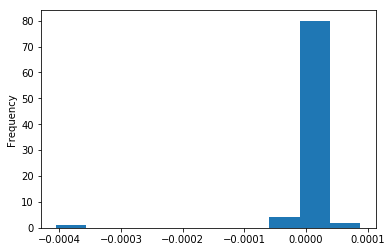

In [24]:
hhTypesLabels = ["CPL_NCH", "CPL_YCH", "CPL_OCH", "M1_YCH", "M1_OCH", "F1_YCH", "F1_OCH", "A1_HH", "MULTI_HH"]

newTotal = dfhouseholdType[hhTypesLabels].sum(axis=1)

# See the amount of differences which is very limited (~0.04% of total household maximim)
dfhouseholdType.sub(newTotal, axis="index").div(dfhouseholdType["TOTAL"], axis="index")[newTotal != dfhouseholdType["TOTAL"]]["TOTAL"].plot.hist()

In [121]:
dfhouseholdTypePDF = dfhouseholdType[hhTypesLabels].copy(deep=True)
dfhouseholdTypePDFSUM = dfhouseholdTypePDF.sum(axis=1)
dfhouseholdTypePDF = dfhouseholdTypePDF.div(dfhouseholdTypePDFSUM, axis="index")
del dfhouseholdTypePDFSUM

dfhouseholdTypeCDF = dfhouseholdTypePDF.copy(deep=True).cumsum(axis=1)
dfhouseholdTypeCDF.head()

,CPL_NCH,CPL_YCH,CPL_OCH,M1_YCH,M1_OCH,F1_YCH,F1_OCH,A1_HH,MULTI_HH
NUTS,,,,,,,,,
BE,0.254550,0.502511,0.531862,0.545735,0.550130,0.613464,0.631612,0.972212,1.0
BE1,0.152122,0.342665,0.356739,0.371277,0.374292,0.456374,0.472015,0.964241,1.0
BE10,0.152122,0.342665,0.356739,0.371277,0.374292,0.456374,0.472015,0.964241,1.0
BE2,0.290205,0.552976,0.586361,0.598961,0.603430,0.652927,0.669528,0.973092,1.0
BE21,0.277494,0.526256,0.556243,0.570777,0.574988,0.628168,0.643085,0.969559,1.0


In [122]:
dfhouseholdTypePDF.head()

,CPL_NCH,CPL_YCH,CPL_OCH,M1_YCH,M1_OCH,F1_YCH,F1_OCH,A1_HH,MULTI_HH
NUTS,,,,,,,,,
BE,0.254550,0.247961,0.029351,0.013873,0.004395,0.063334,0.018148,0.340600,0.027788
BE1,0.152122,0.190543,0.014075,0.014537,0.003015,0.082082,0.015641,0.492225,0.035759
BE10,0.152122,0.190543,0.014075,0.014537,0.003015,0.082082,0.015641,0.492225,0.035759
BE2,0.290205,0.262772,0.033385,0.012600,0.004469,0.049497,0.016601,0.303564,0.026908
BE21,0.277494,0.248762,0.029986,0.014535,0.004211,0.053179,0.014918,0.326474,0.030441


## The CDF on the size of each household type

In [27]:
dfFamilyTypeSize.head()

TOTAL                                                                  \
        10   11        2       3       4       5      6      7     8     9   
NUTS                                                                         
BE     494  340  1560945  692956  575246  196809  52376  13071  4076  1329   
BE1     86   47   126361   62131   47586   21091   7831   2439   737   217   
BE10    86   47   126361   62131   47586   21091   7831   2439   737   217   
BE2    263  220   947842  400219  348698  110605  26764   6281  2044   711   
BE21   148  143   259554  106065   92558   31597   8749   2416   940   375   

       ...    F1_OCH                                                    \
       ...        11        2       3      4     5    6    7    8    9   
NUTS   ...                                                               
BE     ...       0.0  80333.0  7112.0  633.0  78.0  9.0  4.0  0.0  0.0   
BE1    ...       0.0   7904.0   749.0   81.0  14.0  1.0  0.0  0.0  0.0   
BE10   ...       0.0   7904.0   749.0   81.0  14.0  1.0  0.0  0.0  0.0   
BE2    ...       0.0  41291.0  3727.0  298.0  43.0  7.0  3.0  0.0  0.0   
BE21   ...       0.0  10498.0   968.0   77.0  12.0  1.0  2.0  0.0  0.0   

               
        TOTAL  
NUTS           
BE    88169.0  
BE1    8749.0  
BE10   8749.0  
BE2   45369.0  
BE21  11558.0  

[5 rows x 209 columns]

In [28]:
aggregations = {\
                   "CPL_NCH":  ["MAR_NCH", "REP_NCH", "CSU_NCH"],\
                   "CPL_YCH":  ["MAR_YCH", "REP_YCH", "CSU_YCH"],\
                   "CPL_OCH":  ["MAR_OCH", "REP_OCH", "CSU_OCH"],\
                   "M1_YCH":   ["M1_YCH"],\
                   "M1_OCH":   ["M1_OCH"],\
                   "F1_YCH":   ["F1_YCH"],\
                   "F1_OCH":   ["F1_OCH"],\
                   "A1_HH":    ["P1"],\
                   "MULTI_HH": ["MULTI", "FAM_GE2"],\
              }

In [126]:
# CDF & PDF

dfs_cdf = {k: dfFamilyTypeSize[l].sum(axis=1, level=1) for k, l in aggregations.items() if k not in ["A1_HH", "MULTI_HH"]}
dfs_pdf = {k: dfFamilyTypeSize[l].sum(axis=1, level=1) for k, l in aggregations.items() if k not in ["A1_HH", "MULTI_HH"]}

# Adding the size 1 column to zeros and renaming...
for dk in dfs_cdf.keys():
    dfs_cdf[dk]["1"] = np.zeros(dfs_cdf[dk].shape[0])
    dfs_pdf[dk]["1"] = np.zeros(dfs_pdf[dk].shape[0])
    
    dfs_cdf[dk].rename(columns={k: int(k) if k!= "TOTAL" else k for k in dfs_cdf[dk].columns}, inplace=True)
    dfs_pdf[dk].rename(columns={k: int(k) if k!= "TOTAL" else k for k in dfs_pdf[dk].columns}, inplace=True)
    
    dfs_cdf[dk] = dfs_cdf[dk][sorted(dfs_cdf[dk].columns)].div(dfs_cdf[dk]["TOTAL"], axis="index")
    dfs_pdf[dk] = dfs_cdf[dk][sorted(dfs_cdf[dk].columns)].div(dfs_cdf[dk]["TOTAL"], axis="index")
    
    del dfs_cdf[dk]["TOTAL"]
    del dfs_pdf[dk]["TOTAL"]
    
    dfs_cdf[dk] = dfs_cdf[dk].cumsum(axis=1)
    
# Doing the trivial ones
dfs_cdf["A1_HH"] = dfs_cdf[dk].copy(deep=True)
dfs_pdf["A1_HH"] = dfs_pdf[dk].copy(deep=True)

dfs_cdf["A1_HH"].loc[:] = np.zeros(dfs_cdf["A1_HH"].shape)
dfs_pdf["A1_HH"].loc[:] = np.zeros(dfs_pdf["A1_HH"].shape)

dfs_cdf["A1_HH"][1] = 1.
dfs_pdf["A1_HH"][1] = 1.

# The multi has the same size distribution of the overall case
tmp_df = dfFamilyTypeSize["TOTAL"].copy(deep=True)
tmp_total = tmp_df["TOTAL"].copy()

del tmp_df["TOTAL"]

tmp_df.rename(columns={k: int(k) for k in tmp_df.columns}, inplace=True)
tmp_df[1] = np.zeros(tmp_df.shape[0])
tmp_df = tmp_df[sorted(tmp_df.columns)]

dfs_cdf["MULTI_HH"] = tmp_df.cumsum(axis=1)
dfs_cdf["MULTI_HH"] = dfs_cdf["MULTI_HH"].div(tmp_total, axis="index")

dfs_pdf["MULTI_HH"] = tmp_df.copy(deep=True)
dfs_pdf["MULTI_HH"] = dfs_pdf["MULTI_HH"].div(tmp_total, axis="index")


dfsHouseHoldType_sizeCDF = dfs_cdf
dfsHouseHoldType_sizePDF = dfs_pdf
del dfs_cdf, dfs_pdf, tmp_df, tmp_total

In [127]:
dfsHouseHoldType_sizeCDF["MULTI_HH"].head()

,1,2,3,4,5,6,7,8,9,10,11
NUTS,,,,,,,,,,,
BE,0,0.503914,0.727618,0.913323,0.976858,0.993766,0.997986,0.999302,0.999731,0.99989,1
BE1,0,0.470573,0.701951,0.879163,0.957706,0.986869,0.995952,0.998697,0.999505,0.999825,1
BE10,0,0.470573,0.701951,0.879163,0.957706,0.986869,0.995952,0.998697,0.999505,0.999825,1
BE2,0,0.514113,0.731193,0.920327,0.98032,0.994837,0.998244,0.999352,0.999738,0.999881,1
BE21,0,0.516479,0.727535,0.911713,0.974587,0.991997,0.996804,0.998675,0.999421,0.999715,1


In [128]:
dfsHouseHoldType_sizePDF["MULTI_HH"].head()

,1,2,3,4,5,6,7,8,9,10,11
NUTS,,,,,,,,,,,
BE,0,0.503914,0.223704,0.185704,0.0635351,0.0169083,0.00421966,0.00131584,0.000429036,0.000159476,0.000109761
BE1,0,0.470573,0.231378,0.177212,0.0785436,0.0291629,0.00908292,0.00274461,0.000808115,0.000320267,0.00017503
BE10,0,0.470573,0.231378,0.177212,0.0785436,0.0291629,0.00908292,0.00274461,0.000808115,0.000320267,0.00017503
BE2,0,0.514113,0.21708,0.189135,0.0599925,0.0145169,0.00340683,0.00110867,0.000385649,0.000142652,0.000119329
BE21,0,0.516479,0.211056,0.184179,0.062874,0.0174094,0.00480753,0.00187048,0.000746202,0.000294501,0.000284552


## Try the toy

Here we have to generate the possible kind of households.

Each household accept some constraint on the age of the parents (adults) and sons (children), the difference in age etc;
moreover each household type accepts a cdf for the age of the adults and one for the age of the children.

In [344]:
import synpopStructures
reload(synpopStructures)

<module 'synpopStructures' from 'synpopStructures.py'>

In [924]:
# Here we prepare the CDF and PDF for the household distribution...
# Select a geographical area...
selectedNUTS = "DE"

# Household labels
houseHoldLabels = ["CPL_NCH", "CPL_YCH", "CPL_OCH", "M1_YCH", "M1_OCH", "F1_YCH", "F1_OCH", "A1_HH", "MULTI_HH"]

# The age distribution for male and female for parents and children of each household type
agePerHouseHoldNUTS = selectedNUTS[:2] # We have them only per state!
ageCDFparentSonHHtype = {}

'''
To do: "CPL_XCH": ["MAR", "CSU"], "A1_XCH": ["PAR1"], "A1_HH": ["P1", "UNK"], "CH_AGE": ["CH_PAR"], NO : "TOTAL": ["TOTAL"],\
'''

# Couples parents (withouth, with young or with old son)
ageCDFparentSonHHtype["CPL_XCH"] = np.column_stack((dfPopulationAgeHHstatus2011_CDF[("male",   "CPL_XCH")].loc[agePerHouseHoldNUTS],\
                                                    dfPopulationAgeHHstatus2011_CDF[("female", "CPL_XCH")].loc[agePerHouseHoldNUTS]))
# Lone parents
ageCDFparentSonHHtype["A1_XCH"] = np.column_stack((dfPopulationAgeHHstatus2011_CDF[("male",   "A1_XCH")].loc[agePerHouseHoldNUTS],\
                                                   dfPopulationAgeHHstatus2011_CDF[("female", "A1_XCH")].loc[agePerHouseHoldNUTS]))
# Age distrib of singles
ageCDFparentSonHHtype["A1_HH"] = np.column_stack((dfPopulationAgeHHstatus2011_CDF[("male",   "A1_HH")].loc[agePerHouseHoldNUTS],\
                                                  dfPopulationAgeHHstatus2011_CDF[("female", "A1_HH")].loc[agePerHouseHoldNUTS]))
# Age distrib of children with parents
ageCDFparentSonHHtype["CH_PAR"] = np.column_stack((dfPopulationAgeHHstatus2011_CDF[("male",   "CH_AGE")].loc[agePerHouseHoldNUTS],\
                                                   dfPopulationAgeHHstatus2011_CDF[("female", "CH_AGE")].loc[agePerHouseHoldNUTS]))

# The overall age distribution
sexAgeCDF_array = np.column_stack((sexAgeCDF["male"].loc[selectedNUTS], sexAgeCDF["female"].loc[selectedNUTS]))
sexAgePDF_array = np.column_stack((sexAgePDF["male"].loc[selectedNUTS], sexAgePDF["female"].loc[selectedNUTS]))

# The household type distribution
houseHoldTypeCDF = np.array(dfhouseholdTypeCDF.loc[selectedNUTS])
houseHoldTypePDF = np.array(dfhouseholdTypePDF.loc[selectedNUTS])

# The size distribution for each household type distribution
houseHoldType_sizeCDF = np.array([dfsHouseHoldType_sizeCDF[k].loc[selectedNUTS] for k in houseHoldLabels])
houseHoldType_sizePDF = np.array([dfsHouseHoldType_sizePDF[k].loc[selectedNUTS] for k in houseHoldLabels])


In [925]:
sexAgeCDF_array[-1], sexAgePDF_array[-1]

(array([ 1.,  1.]), array([  4.28907814e-05,   2.86460303e-04]))

In [926]:
houseHoldTypeCDF, houseHoldTypeArray.shape, houseHoldTypeCDF.shape, houseHoldType_sizeCDF.shape

(array([ 0.28389644,  0.48956517,  0.51713233,  0.52482777,  0.52831332,
         0.57556037,  0.59044745,  0.96314776,  1.        ]),
 (9,),
 (9,),
 (9, 11))

In [927]:
# Couple without children
CPL_NCH = synpopStructures.householdType(minMaxParents=(2,2), minMaxSons=(0,0), ageMinMaxParents=(18,100), sexParents="etero",\
                                         ageCDFparents=ageCDFparentSonHHtype["CPL_XCH"], ageCDFsons=None,\
                                       )

# Couple with young and old children
CPL_YCH = synpopStructures.householdType(minMaxParents=(2,2), minMaxSons=(1,9), ageMinMaxParents=(18,100), ageMinMaxChildren=(0, 50),\
                                         dMinMaxParSon=(18,50), sexParents="etero", sexSons="free",\
                                         ageCDFparents=ageCDFparentSonHHtype["CPL_XCH"], ageCDFsons=ageCDFparentSonHHtype["CH_PAR"],\
                                       )
CPL_OCH = synpopStructures.householdType(minMaxParents=(2,2), minMaxSons=(1,9), ageMinMaxParents=(43,100), ageMinMaxChildren=(25, 70),\
                                         dMinMaxParSon=(18,50), sexParents="etero", sexSons="free",\
                                         ageCDFparents=ageCDFparentSonHHtype["CPL_XCH"], ageCDFsons=ageCDFparentSonHHtype["CH_PAR"],\
                                       )
CPL_OCH = CPL_YCH

# Lone father/mother with young/old children
M1_YCH  = synpopStructures.householdType(minMaxParents=(1,1), minMaxSons=(1,10), ageMinMaxParents=(18,100), ageMinMaxChildren=(0,50),\
                                         dMinMaxParSon=(18,50), sexParents="male", sexSons="free",\
                                         ageCDFparents=ageCDFparentSonHHtype["A1_XCH"], ageCDFsons=ageCDFparentSonHHtype["CH_PAR"],\
                                       )
M1_OCH  = synpopStructures.householdType(minMaxParents=(1,1), minMaxSons=(1,10), ageMinMaxParents=(43,100), ageMinMaxChildren=(25,70),\
                                         dMinMaxParSon=(18,50), sexParents="male", sexSons="free",\
                                         ageCDFparents=ageCDFparentSonHHtype["CPL_XCH"], ageCDFsons=ageCDFparentSonHHtype["CH_PAR"],\
                                       )
M1_OCH = M1_YCH

F1_YCH  = synpopStructures.householdType(minMaxParents=(1,1), minMaxSons=(1,10), ageMinMaxParents=(18,100), ageMinMaxChildren=(0,50),\
                                         dMinMaxParSon=(18,50), sexParents="female", sexSons="free",\
                                         ageCDFparents=ageCDFparentSonHHtype["CPL_XCH"], ageCDFsons=ageCDFparentSonHHtype["CH_PAR"],\
                                       )
F1_OCH  = synpopStructures.householdType(minMaxParents=(1,1), minMaxSons=(1,10), ageMinMaxParents=(43,100), ageMinMaxChildren=(25,70),\
                                         dMinMaxParSon=(18,50), sexParents="female", sexSons="free",\
                                         ageCDFparents=ageCDFparentSonHHtype["CPL_XCH"], ageCDFsons=ageCDFparentSonHHtype["CH_PAR"],\
                                       )
F1_OCH = M1_YCH

# Singles and multihouseholds share the same age distribution (but different size)
A1_HH  = synpopStructures.householdType(minMaxParents=(1,1), minMaxSons=(0,0), ageMinMaxParents=(17, 100), sexParents="free",\
                                         ageCDFparents=ageCDFparentSonHHtype["A1_HH"], ageCDFsons=None,\
                                       )
MULTI_HH  = synpopStructures.householdType(minMaxParents=(2,11), minMaxSons=(0,0), ageMinMaxParents=(17, 100),\
                                         sexParents="free", dMinMaxp1p2=(0, 20), dMinMaxParSon=(30, 100), fixedParentsSons=(False, True),\
                                         ageCDFparents=ageCDFparentSonHHtype["A1_HH"], ageCDFsons=None,\
                                       )

In [928]:
houseHoldTypeArray = np.array([CPL_NCH, CPL_YCH, CPL_OCH, M1_YCH, M1_OCH, F1_YCH, F1_OCH, A1_HH, MULTI_HH])

In [929]:
%%time
pop = 500000
created = 0

houseHolds = []
while created < pop:
    tmp_hh_kind = np.argmax(houseHoldTypeCDF > np.random.rand())
    tmp_hh_size = np.argmax(houseHoldType_sizeCDF[tmp_hh_kind] > np.random.rand()) + 1
    
    try:
        tmp_components = houseHoldTypeArray[tmp_hh_kind].makeHousehold(tmp_hh_size)
    except AssertionError as e:
        print tmp_hh_kind, tmp_hh_size
    
    houseHolds.append((tmp_hh_kind, tmp_hh_size, tmp_components))
    created += tmp_hh_size

CPU times: user 10.8 s, sys: 9.93 ms, total: 10.8 s
Wall time: 10.8 s


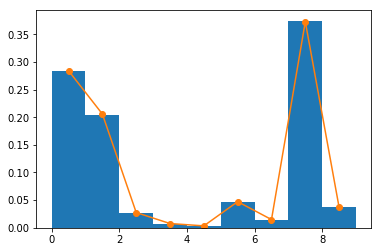

In [930]:
# Household type frequency
plt.hist([hh[0] for hh in houseHolds], bins=np.arange(0, 9.001), density=True)
plt.plot(np.arange(len(houseHoldTypePDF))+.5, houseHoldTypePDF, "o-")

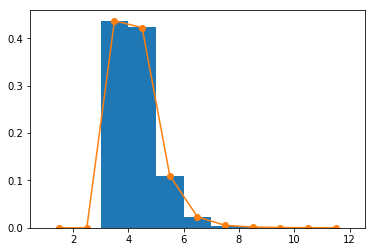

In [931]:
# Household size frequency per hh type
selectedHHtype = 1

plt.hist([hh[1] for hh in houseHolds if hh[0] == selectedHHtype], bins=np.arange(1, 13), density=True)
plt.plot(np.arange(len(houseHoldType_sizeCDF[selectedHHtype]))+1.5, houseHoldType_sizePDF[selectedHHtype], "o-")

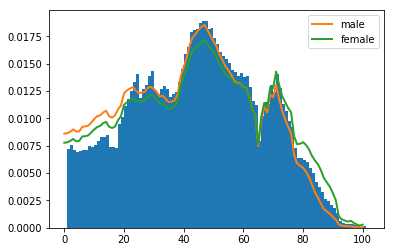

In [935]:
# Overall age
selectedSexes = [0,1]

plt.hist([member[2] for hh in houseHolds for member in hh[2] if member[1] in selectedSexes], bins=np.arange(0,103,1), normed=True);
plt.plot(np.arange(len(sexAgePDF_array[:,0])), sexAgePDF_array[:,0], label="male", lw=2)
plt.plot(np.arange(len(sexAgePDF_array[:,0])), sexAgePDF_array[:,1], label="female", lw=2)

plt.legend()

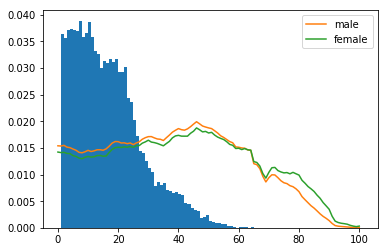

In [547]:
# age for household kind
selectedSexes = [0]
selectedHHkinds = [0, 1, 2, 3, 4, 5, 6, 7, 8]
selectedRoles = [1] # 0 parent, 1 children
factor = 1.25

ages = np.array([member[2] for hh in houseHolds for member in hh[2]\
            if member[1] in selectedSexes and member[0] in selectedRoles and hh[0] in selectedHHkinds])
bins= max(ages) - min(ages) - 1


plt.hist(ages, bins=np.arange(102), normed=True);
plt.plot(factor*sexAgePDF_array[:,0], label="male")
plt.plot(factor*sexAgePDF_array[:,1], label="female")

plt.legend()

In [333]:
b = np.array([.1,.5,.2,.2])

np.argmax(.99995<b)

0

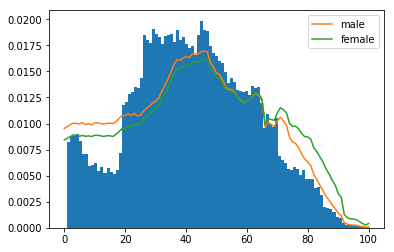

In [388]:
selectedSexes = [1]

plt.hist([member[2] for hh in houseHolds for member in hh[2] if member[1] in selectedSexes], bins=100, normed=True);
plt.plot(sexAgePDF_array[:,0], label="male")
plt.plot(sexAgePDF_array[:,1], label="female")

plt.legend()

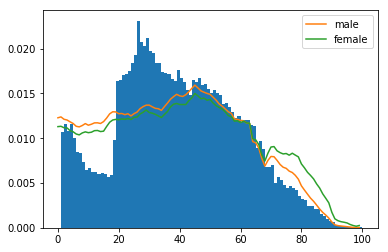

In [333]:
selectedSexes = [0]

plt.hist([member[2] for hh in houseHolds for member in hh[2] if member[1] in selectedSexes], bins=99, normed=True);
plt.plot(np.diff(sexAgeCDF_array[:,0]), label="male")
plt.plot(np.diff(sexAgeCDF_array[:,1]), label="female")

plt.legend()

In [193]:
hh = synpopStructures.householdType(sexParents="etero", sexSons="free")

In [197]:
hh.makeHousehold()

[(0, 1, 55), (0, 0, 54), (1, 0, 11), (1, 0, 25)]

In [186]:
hh.components()

[(0, 0, 42),
 (0, 1, 55),
 (0, 0, 48),
 (0, 1, 39),
 (0, 0, 56),
 (0, 1, 47),
 (1, 1, 15),
 (1, 1, 14),
 (1, 1, 12),
 (1, 1, 15)]

In [77]:
assert 2>1, "OHhhhh"

In [44]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [64]:
a1 = np.arange(0, 101, dtype=float)
a2 = np.cumsum(np.ones(101, dtype=float))
a2 /= a2[-1]
a = np.column_stack((a1,a2))

agesCDF = np.array([a,a])

agesCDF[0]

array([[  0.00000000e+00,   9.90099010e-03],
       [  1.00000000e+00,   1.98019802e-02],
       [  2.00000000e+00,   2.97029703e-02],
       [  3.00000000e+00,   3.96039604e-02],
       [  4.00000000e+00,   4.95049505e-02],
       [  5.00000000e+00,   5.94059406e-02],
       [  6.00000000e+00,   6.93069307e-02],
       [  7.00000000e+00,   7.92079208e-02],
       [  8.00000000e+00,   8.91089109e-02],
       [  9.00000000e+00,   9.90099010e-02],
       [  1.00000000e+01,   1.08910891e-01],
       [  1.10000000e+01,   1.18811881e-01],
       [  1.20000000e+01,   1.28712871e-01],
       [  1.30000000e+01,   1.38613861e-01],
       [  1.40000000e+01,   1.48514851e-01],
       [  1.50000000e+01,   1.58415842e-01],
       [  1.60000000e+01,   1.68316832e-01],
       [  1.70000000e+01,   1.78217822e-01],
       [  1.80000000e+01,   1.88118812e-01],
       [  1.90000000e+01,   1.98019802e-01],
       [  2.00000000e+01,   2.07920792e-01],
       [  2.10000000e+01,   2.17821782e-01],
       [  

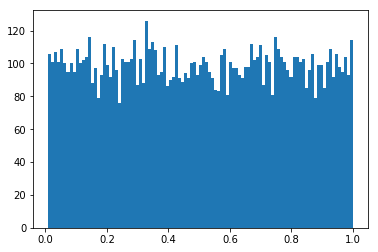

In [70]:
sex = 1
plt.hist([agesCDF[sex, np.argmax(agesCDF[sex,:,1] > u), 1] for u in np.random.rand(10000)], bins=101);